In [68]:
pip install mlxtend


The following command must be run outside of the IPython shell:

    $ pip install mlxtend

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


# import libraries¶


In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

plt.style.use('ggplot')


# load dataset¶


In [8]:
df_train=pd.read_csv('dataset/churn_train.csv')



# exploring data¶


In [9]:
df_train.shape


(1397, 16)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 16 columns):
Customer ID                                    1397 non-null object
network_age                                    1397 non-null int64
Customer tenure in month                       1397 non-null float64
Total Spend in Months 1 and 2 of 2017          1397 non-null float64
Total SMS Spend                                1397 non-null float64
Total Data Spend                               1397 non-null float64
Total Data Consumption                         1397 non-null float64
Total Unique Calls                             1397 non-null int64
Total Onnet spend                              1397 non-null int64
Total Offnet spend                             1397 non-null int64
Total Call centre complaint calls              1397 non-null int64
Network type subscription in Month 1           1397 non-null int64
Network type subscription in Month 2           1397 non-null int64
Most Loved 

In [11]:
df_train.sample(10)


,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
361,ADF0516,3265,108.83,208.5608,23.49,2.50,2.792970e+01,16,0,11457,1,0,0,1,2,1
40,ADF0078,3418,113.93,61.7884,23.90,18.75,8.933828e+02,3,0,681,1,0,0,1,1,1
1242,ADF1798,1212,40.40,1494.8088,4.37,22.50,4.970059e+06,397,3454,4918,4,2,2,3,5,1
162,ADF0317,109,3.63,487.4000,3.50,45.00,5.264283e+04,33,120,0,3,0,2,6,2,0
1025,ADF1581,3702,123.40,65.4980,33.23,1.55,1.142627e+02,6,895,0,1,0,0,5,5,1
161,ADF0316,418,13.93,480.3660,1.75,52.50,2.362759e+07,3,0,509,1,2,2,2,2,0
154,ADF0309,1070,35.67,427.3776,1.75,26.25,1.684506e+04,176,5263,7771,2,1,2,2,2,0
139,ADF0294,215,7.17,316.0600,12.25,91.25,2.058715e+07,3,114,358,1,2,2,2,2,0
77,ADF0115,2826,94.20,792.6188,13.04,5.89,7.235527e+02,131,15682,43586,3,0,0,4,1,1
253,ADF0408,1028,34.27,56.1220,7.17,42.50,3.944536e+03,2,0,358,1,1,1,2,2,1


# cleaning data¶


In [12]:
# check no. fo nulls in columns
df_train.isnull().sum()

Customer ID                                    0
network_age                                    0
Customer tenure in month                       0
Total Spend in Months 1 and 2 of 2017          0
Total SMS Spend                                0
Total Data Spend                               0
Total Data Consumption                         0
Total Unique Calls                             0
Total Onnet spend                              0
Total Offnet spend                             0
Total Call centre complaint calls              0
Network type subscription in Month 1           0
Network type subscription in Month 2           0
Most Loved Competitor network in in Month 1    0
Most Loved Competitor network in in Month 2    0
Churn Status                                   0
dtype: int64

In [13]:
#remove columns spaces
df_train.columns=df_train.columns.str.replace(' ','')


In [14]:
df_train.columns

Index(['CustomerID', 'network_age', 'Customertenureinmonth',
       'TotalSpendinMonths1and2of2017', 'TotalSMSSpend', 'TotalDataSpend',
       'TotalDataConsumption', 'TotalUniqueCalls', 'TotalOnnetspend',
       'TotalOffnetspend', 'TotalCallcentrecomplaintcalls',
       'NetworktypesubscriptioninMonth1', 'NetworktypesubscriptioninMonth2',
       'MostLovedCompetitornetworkininMonth1',
       'MostLovedCompetitornetworkininMonth2', 'ChurnStatus'],
      dtype='object')

In [27]:
# find the correlation between coumns
corr_abs = df_train.corr().abs().stack().sort_values(ascending=False)
corr_abs

ChurnStatus                           ChurnStatus                             1.000000
MostLovedCompetitornetworkininMonth2  MostLovedCompetitornetworkininMonth2    1.000000
Customertenureinmonth                 Customertenureinmonth                   1.000000
TotalSpendinMonths1and2of2017         TotalSpendinMonths1and2of2017           1.000000
TotalSMSSpend                         TotalSMSSpend                           1.000000
TotalDataSpend                        TotalDataSpend                          1.000000
TotalDataConsumption                  TotalDataConsumption                    1.000000
TotalUniqueCalls                      TotalUniqueCalls                        1.000000
TotalOffnetspend                      TotalOffnetspend                        1.000000
TotalCallcentrecomplaintcalls         TotalCallcentrecomplaintcalls           1.000000
NetworktypesubscriptioninMonth1       NetworktypesubscriptioninMonth1         1.000000
NetworktypesubscriptioninMonth2       Netwo

In [29]:
#drop some columns
drop_col = ['TotalSMSSpend', 'TotalDataSpend', 'TotalDataConsumption', 'TotalUniqueCalls']

df_train=df_train.drop(drop_col, axis=1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AECFA9BBA8>,
      dtype=object)

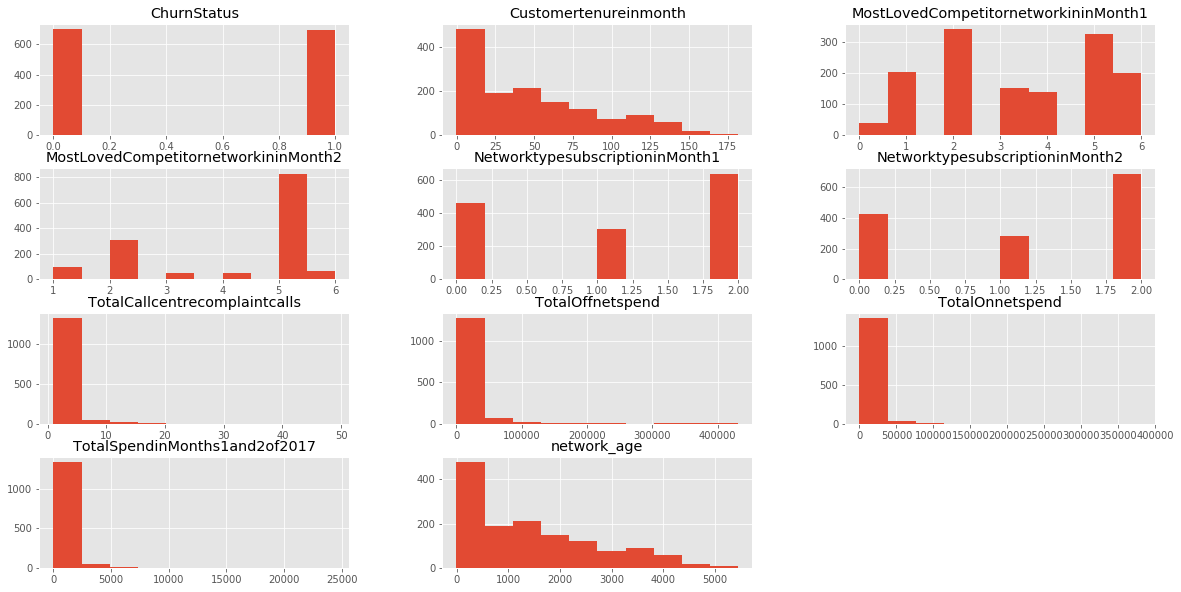

In [40]:
df_train.hist(figsize=(20,10))

In [86]:
# spare the features
lables = df_train['ChurnStatus'].values
lables

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [87]:
# spare the features 
features = df_train.loc[:, df_train.columns != 'ChurnStatus'].values
features

array([[1.1700000e+02, 3.9000000e+00, 4.9670000e+01, ..., 2.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.2300000e+02, 4.1000000e+00, 7.6714000e+01, ..., 1.0000000e+00,
        5.0000000e+00, 1.0000000e+00],
       [1.3420000e+03, 4.4730000e+01, 7.6920000e+01, ..., 2.0000000e+00,
        3.0000000e+00, 1.0000000e+00],
       ...,
       [3.4500000e+02, 1.1500000e+01, 1.6592812e+03, ..., 2.0000000e+00,
        5.0000000e+00, 3.0000000e+00],
       [1.2720000e+03, 4.2400000e+01, 1.9326000e+03, ..., 2.0000000e+00,
        3.0000000e+00, 3.0000000e+00],
       [1.2500000e+02, 4.1700000e+00, 2.1386992e+03, ..., 1.0000000e+00,
        6.0000000e+00, 3.0000000e+00]])

# Standerdize the data

In [88]:
# standrize the values
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [89]:
features

array([[-1.04545563, -1.04545754, -0.6030993 , ...,  0.93188645,
        -1.31852018, -1.96473316],
       [-1.04075427, -1.04075617, -0.58138874, ..., -0.21309629,
         0.90139268, -1.96473316],
       [-0.08559429, -0.08567295, -0.58122337, ...,  0.93188645,
        -0.20856375, -1.96473316],
       ...,
       [-0.86680389, -0.8668055 ,  0.68907499, ...,  0.93188645,
         0.90139268, -0.65428569],
       [-0.14044351, -0.14044391,  0.90849166, ...,  0.93188645,
        -0.20856375, -0.65428569],
       [-1.03918715, -1.03911069,  1.07394533, ..., -0.21309629,
         1.45637089, -0.65428569]])

In [104]:

X_train, X_test, y_train, y_test = train_test_split(features, lables, test_size=0.20)


In [105]:
clf = RandomForestClassifier(n_estimators=1)
clf = clf.fit(X_train, y_train)

# accuracy for training

In [106]:

accuracy = clf.score(X_train, y_train)
print (accuracy*100)

89.61504028648164


# accuracy for testing

In [107]:
accuracy = clf.score(X_test, y_test)
print (accuracy*100)

65.71428571428571


# Training classification report and confusion_matrix

In [110]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

ypredict = clf.predict(X_train)
print  (classification_report(y_train, ypredict))

             precision    recall  f1-score   support

          0       0.89      0.91      0.90       561
          1       0.90      0.88      0.89       556

avg / total       0.90      0.90      0.90      1117



In [109]:
print (confusion_matrix(y_train, ypredict))


[[509  52]
 [ 64 492]]


In [118]:
df_test=pd.read_csv('dataset/churn_test.csv')

In [130]:
#drop some columns
drop_col = ['Total SMS Spend', 'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls']

df_test=df_test.drop(drop_col, axis=1)

In [137]:
# spare the features 
df_test = df_test.drop(columns=['Customer ID'])


In [126]:
features = df_train.loc[:, df_train.columns != 'ChurnStatus'].values

In [141]:
# standrize the values
scaler = StandardScaler()
features_test = scaler.fit_transform(features_test)


array([[-0.20047388, -0.20047388, -0.75102645, ...,  0.57991628,
        -0.1909309 , -2.12628661],
       [-0.67589998, -0.67589998, -1.0384652 , ...,  0.57991628,
        -0.1909309 , -2.12628661],
       [-0.70108306, -0.70108306, -0.89844289, ...,  0.57991628,
        -0.1909309 , -2.12628661],
       ...,
       [-1.0620406 , -1.0620406 , -1.05522393, ..., -1.72438683,
        -1.87561536, -0.06193068],
       [-0.03792852, -0.03792852,  0.43637533, ..., -1.72438683,
        -1.87561536, -0.06193068],
       [-1.05746186, -1.05746186,  0.3670222 , ..., -1.72438683,
        -1.87561536, -0.75004932]])

In [142]:
mydf = pd.read_csv('dataset/churn_test.csv')

In [138]:
df_test.head()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2
0,1251,41.700000,514.8840,708,38807,1,1,1,3,1
1,628,20.933333,276.8200,4097,669,1,1,1,3,1
2,595,19.833333,392.7900,3258,1540,1,1,1,3,1
3,212,7.066667,2609.2800,27996,8520,1,1,1,3,2
4,2252,75.066667,231.5012,10344,1345,3,1,1,3,2


In [144]:
cust = mydf.filter(["Customer ID"])
cust

,Customer ID
0,ADF0030
1,ADF0172
2,ADF0205
3,ADF0876
4,ADF0909
5,ADF0916
6,ADF0920
7,ADF0922
8,ADF0964
9,ADF0009


In [149]:
features_test = features_test.fit_transform(features_test)

features_test = pd.DataFrame(features_test)

AttributeError: 'DataFrame' object has no attribute 'fit_transform'

In [147]:
result = pd.DataFrame(clf.predict(features_test))

ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 14 